# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

['sabang',
 'masallatah',
 'flinders',
 'puerto madryn',
 'lebu',
 'heyang',
 'ilulissat',
 'nizhniy tsasuchey',
 'barentsburg',
 'ugoofaaru',
 'la crosse',
 'wazzan',
 'albany',
 'ushuaia',
 'mahebourg',
 'rikitea',
 'busselton',
 'san patricio',
 'illoqqortoormiut',
 'acari',
 'vaini',
 'kyzyl-suu',
 'lolua',
 'pundaguitan',
 'isangel',
 'soloneshnoye',
 'mataura',
 'college',
 'khatanga',
 'aleksandrov gay',
 'goderich',
 'churapcha',
 'tuktoyaktuk',
 'yellowknife',
 'victoria point',
 'provideniya',
 'tianpeng',
 'vestmannaeyjar',
 'guerrero negro',
 'fairbanks',
 'atuona',
 'hobart',
 'verkhoyansk',
 'tiksi',
 'arman',
 'yomitan',
 'nizhneyansk',
 'atikokan',
 'lorengau',
 'imbituba',
 'yar-sale',
 'puerto ayora',
 'qena',
 'punta arenas',
 'hermanus',
 'jamestown',
 'aasiaat',
 'barcelos',
 'harbour breton',
 'pangnirtung',
 'clyde river',
 'hithadhoo',
 'nikolskoye',
 'la ronge',
 'nome',
 'bluff',
 'pyay',
 'beringovskiy',
 'kaitangata',
 'jimeta',
 'castro',
 'tarudant',
 'por

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists
city_name = []
lat = []
lon = []
high = []
humid = []
cloud = []
wind = []
country = []
time = []

cty_ct = 1

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
print("Beggining Data Retrieval")
print("------------------------")
for place in cities:
    try:        
        response = requests.get(f"{url}&q={place}&APPID={weather_api_key}").json() 
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        high.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        time.append(response['dt'])
        print(f"Processing Record {cty_ct} of set 1 | {place}")
        cty_ct = cty_ct + 1
    except:
        print(f"City not found! Skipping...")      

Beggining Data Retrieval
------------------------
Processing Record 1 of set 1 | sabang
Processing Record 2 of set 1 | masallatah
Processing Record 3 of set 1 | flinders
Processing Record 4 of set 1 | puerto madryn
Processing Record 5 of set 1 | lebu
Processing Record 6 of set 1 | heyang
Processing Record 7 of set 1 | ilulissat
Processing Record 8 of set 1 | nizhniy tsasuchey
City not found! Skipping...
Processing Record 9 of set 1 | ugoofaaru
Processing Record 10 of set 1 | la crosse
City not found! Skipping...
Processing Record 11 of set 1 | albany
Processing Record 12 of set 1 | ushuaia
Processing Record 13 of set 1 | mahebourg
Processing Record 14 of set 1 | rikitea
Processing Record 15 of set 1 | busselton
Processing Record 16 of set 1 | san patricio
City not found! Skipping...
Processing Record 17 of set 1 | acari
Processing Record 18 of set 1 | vaini
Processing Record 19 of set 1 | kyzyl-suu
City not found! Skipping...
Processing Record 20 of set 1 | pundaguitan
Processing Recor

Processing Record 182 of set 1 | ngama
Processing Record 183 of set 1 | mutata
Processing Record 184 of set 1 | lompoc
Processing Record 185 of set 1 | tura
City not found! Skipping...
Processing Record 186 of set 1 | coihaique
Processing Record 187 of set 1 | torbay
Processing Record 188 of set 1 | atasu
Processing Record 189 of set 1 | havre-saint-pierre
City not found! Skipping...
Processing Record 190 of set 1 | nortelandia
Processing Record 191 of set 1 | tucumcari
Processing Record 192 of set 1 | mar del plata
Processing Record 193 of set 1 | oranjemund
Processing Record 194 of set 1 | bethel
Processing Record 195 of set 1 | warrington
Processing Record 196 of set 1 | charters towers
City not found! Skipping...
Processing Record 197 of set 1 | solnechnyy
Processing Record 198 of set 1 | cabo san lucas
Processing Record 199 of set 1 | realeza
Processing Record 200 of set 1 | kingisepp
Processing Record 201 of set 1 | talnakh
Processing Record 202 of set 1 | strezhevoy
Processing R

Processing Record 364 of set 1 | sibiti
Processing Record 365 of set 1 | yakovlevka
Processing Record 366 of set 1 | meulaboh
Processing Record 367 of set 1 | cody
Processing Record 368 of set 1 | borovikha
Processing Record 369 of set 1 | nara
Processing Record 370 of set 1 | graciano sanchez
Processing Record 371 of set 1 | wanning
Processing Record 372 of set 1 | maningrida
Processing Record 373 of set 1 | constitucion
Processing Record 374 of set 1 | lethem
Processing Record 375 of set 1 | viedma
Processing Record 376 of set 1 | severo-yeniseyskiy
Processing Record 377 of set 1 | otane
Processing Record 378 of set 1 | olafsvik
Processing Record 379 of set 1 | pacific grove
Processing Record 380 of set 1 | cap malheureux
Processing Record 381 of set 1 | kantang
Processing Record 382 of set 1 | baculin
Processing Record 383 of set 1 | puerto escondido
Processing Record 384 of set 1 | erzincan
Processing Record 385 of set 1 | tokur
Processing Record 386 of set 1 | dauriya
Processing R

Processing Record 549 of set 1 | callaguip
Processing Record 550 of set 1 | kempele
Processing Record 551 of set 1 | arcata
Processing Record 552 of set 1 | campiglia marittima
Processing Record 553 of set 1 | inta
Processing Record 554 of set 1 | geraldton
City not found! Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lon,
    "Max Temp": high,
    "Humidity": humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,     
    "Country":country,
    "Date":time}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.count()
        

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [16]:
# Save to CSV
weather_df.to_csv('Output_data/weather.csv')

# Display data 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabang,5.8933,95.3214,82.69,74,95,13.96,ID,1615757860
1,Masallātah,32.6167,14.0000,54.54,69,0,9.42,LY,1615757861
2,Flinders,-34.5833,150.8552,57.99,77,0,1.01,AU,1615757861
3,Puerto Madryn,-42.7692,-65.0385,65.21,65,78,18.10,AR,1615757861
4,Lebu,-37.6167,-73.6500,61.50,75,0,5.57,CL,1615757862


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
for h in weather_df["Humidity"]:
    if h > 100:
        print("At least 1 city has humidity greater than 100%")
        break
    else:
        print("No cities have hunidity above 100%")
        break

no cities have hunidity above 100%


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

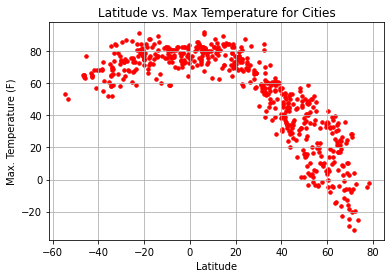

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature for Cities")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

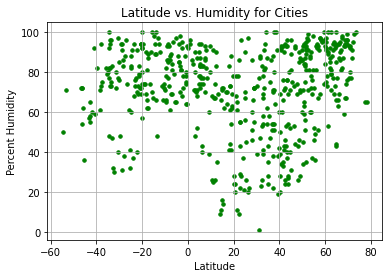

In [33]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=12, color='green')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity for Cities")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

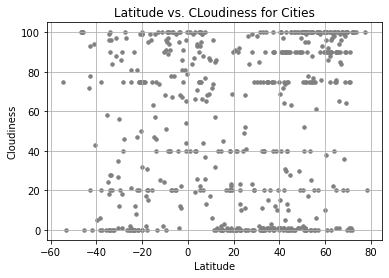

In [35]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=12, color='gray')

# Incorporate the other graph properties
plt.title("Latitude vs. CLoudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

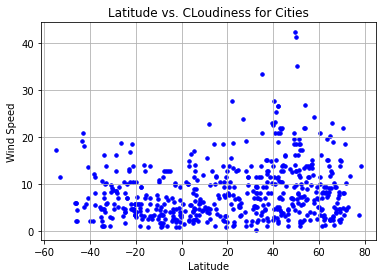

In [36]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=12, color='blue')

# Incorporate the other graph properties
plt.title("Latitude vs. CLoudiness for Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression